In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X.iloc[0])

def show_image(data, digit):
    some_digit = np.array(data.iloc[digit])
    some_digit_image = some_digit.reshape(28, 28)
    
    plt.imshow(some_digit_image, cmap = mpl.cm.binary)
    plt.axis("off")
    plt.show()

In [5]:
y = y.astype(np.uint8)

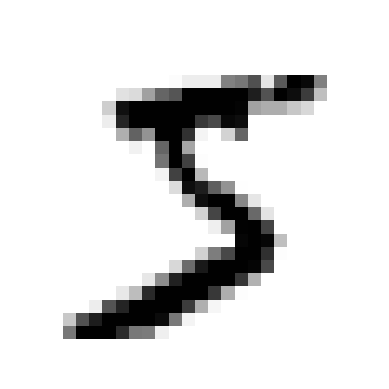

In [6]:
show_image(X, 0)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
instances = np.array(X.iloc[:101])
images_per_row=10

"""
A divisão inteira // trabalha em 'casa de 10', ou seja, só será alterado o valor resultante quando um dos operados mudar de 10 unidades.
Nós fazemos len(instances)-1 para tratar os casos que 'passam', por exemplo, 100//10 = 10, porém, 101//10=10, o que geraria um erro, onde 
tentariamos adicionar 101 imagens onde cabem apenas 100. 

Para resolver isso, subtraímos uma unidade em len(instances) e adicionamos no final, por fora. Pois, revendo os casos anteriores, temos que: 
99//10 = 9 + 1 = 10    e  100//10=10+1=11
Como voltamos uma unidade em len(instances) precisamos adicionar uma ao final, mas fazendo dessa forma, garantimos que, mesmo que o resultado 
da divisão inteiro não mude, incluiremos a quantidadade necessária no final
"""

(len(instances)-1) // images_per_row + 1

11

In [9]:
pd.DataFrame(instances)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
size = 28
n_rows = (len(instances) - 1) // images_per_row + 1


n_empty = n_rows * images_per_row - len(instances)  
padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
padded_instances.shape

(110, 784)

In [90]:
def plot_digits(instances, images_per_row=10, **options):

    size = 28
    images_per_row = min(len(instances), images_per_row) 
    """verificando caso o usuário passe mais images_per_row do que instances"""
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)  
    """n_rows * images_pew_row = quantidade total de espaços na grid. 
    Fazendo -len(instances) verificamos a quantidade de espaços vazios, 
    dado a quantidade de instances passadas"""
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:

    """This is because of the order the reshape works, at the end, your matrix should have the 28x28 pixels like so:
    [[ 1,  2,  5,  6,  9, 10, 13, 14],
    [ 3,  4,  7,  8, 11, 12, 15, 16],
    [17, 18,  1,  2,  1,  2,  1,  2],
    [19, 20,  1,  2,  1,  2,  1,  2]]
    """
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary)
    plt.axis("off")

In [12]:
a = np.array([[[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]], [[13, 14], [15, 16]]], [[[17, 18], [19, 20]], [[1, 2], [1, 2]], [[1, 2], [1, 2]], [[1, 2], [1, 2]]]])
a

array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]],


       [[[17, 18],
         [19, 20]],

        [[ 1,  2],
         [ 1,  2]],

        [[ 1,  2],
         [ 1,  2]],

        [[ 1,  2],
         [ 1,  2]]]])

In [13]:
a = a.transpose(0, 2, 1, 3)
a

array([[[[ 1,  2],
         [ 5,  6],
         [ 9, 10],
         [13, 14]],

        [[ 3,  4],
         [ 7,  8],
         [11, 12],
         [15, 16]]],


       [[[17, 18],
         [ 1,  2],
         [ 1,  2],
         [ 1,  2]],

        [[19, 20],
         [ 1,  2],
         [ 1,  2],
         [ 1,  2]]]])

In [14]:
a.reshape(4, 8)

array([[ 1,  2,  5,  6,  9, 10, 13, 14],
       [ 3,  4,  7,  8, 11, 12, 15, 16],
       [17, 18,  1,  2,  1,  2,  1,  2],
       [19, 20,  1,  2,  1,  2,  1,  2]])

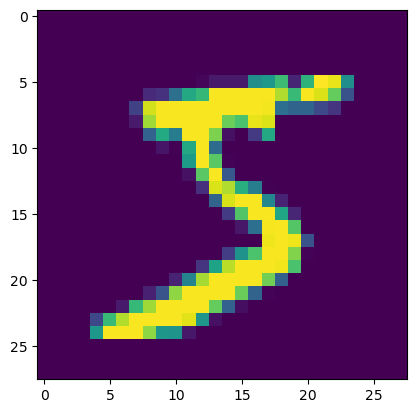

In [15]:
plt.imshow(image_grid[0, 0])

In [16]:
A = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10 ,11, 12]], 
             [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])

A

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [17]:
A_T = A.transpose(2, 1, 0)
A_T

array([[[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]],

       [[ 4, 16],
        [ 8, 20],
        [12, 24]]])

In [18]:
A_T[0]

array([[ 1, 13],
       [ 5, 17],
       [ 9, 21]])

# 🔵 Train a model

In [19]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train.values, y_train_5.values)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([X_train.iloc[0]])

array([ True])

# 🔵 Build Cross-Validation

In [22]:
X_train.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def my_cross_validation(model, X, y, n_splits=3, shuffle=False, random_state=False):
    
    if (random_state != False):
        skfolds = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    else:
        skfolds = StratifiedKFold(n_splits=n_splits, shuffle=shuffle)

    results = []
    for train_index, test_index in skfolds.split(X, y):
        model_clone = clone(model)
        
        X_train_fold = X.loc[train_index]
        X_test_fold = X.loc[test_index]
        y_train_fold = y.loc[train_index]
        y_test_fold = y.loc[test_index]
        
        model_clone.fit(X_train_fold, y_train_fold)
        
        y_pred = model_clone.predict(X_test_fold)
        
        n_correct = sum(y_pred == y_test_fold)
        results.append(n_correct/ len(y_pred))
    
    return results

In [24]:
my_cross_validation(sgd_clf, X_train, y_train_5, shuffle=True, random_state=42)

[0.9669, 0.91625, 0.96785]

# 🔵 Accuracy

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# this is not a good score, accuracy is just a bad metric

array([0.95035, 0.96035, 0.9604 ])

# Confusion Matrix

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# This will run cross validation in 1 smaller sets (test sets) and train the model on the other 2, three times.
# The sum of the size of the three smaller sets used as test sests is equal to the size of the input data

In [27]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score, recall_score

display(precision_score(y_train_5, y_train_pred))
recall_score(y_train_5, y_train_pred)

0.8370879772350012

0.6511713705958311

# Precision-Recall Trade-off

In [30]:
y_scores_function = sgd_clf.decision_function
y_scores = y_scores_function([some_digit])

threshold = 0

y_pred = y_scores > threshold
y_pred

array([ True])

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [32]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [33]:
# !pip install scienceplots

In [34]:
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

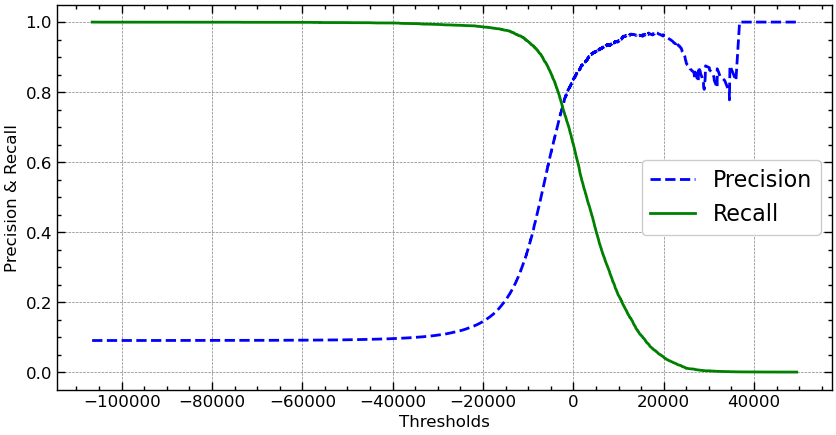

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.figure(figsize=(10, 5))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plt.ylabel("Precision & Recall", fontsize=12)
plt.xlabel("Thresholds", fontsize=12)

plt.legend()

plt.savefig("graph-1")
plt.show()

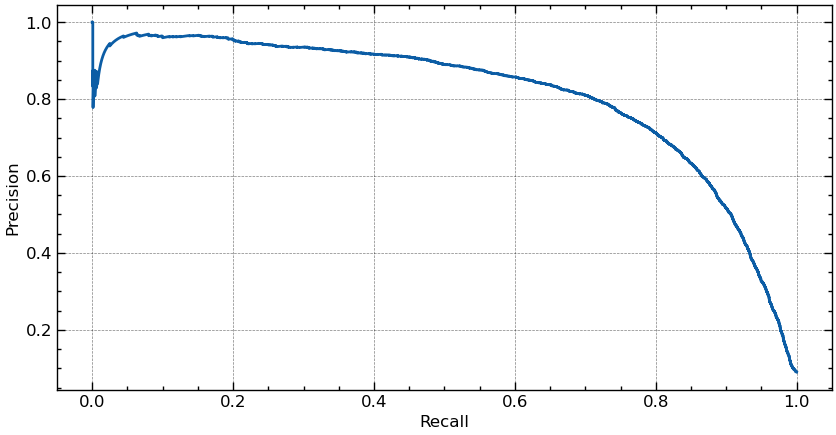

In [36]:
plt.figure(figsize=(10, 5))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.plot(recalls, precisions)

plt.ylabel("Precision", fontsize=12)
plt.xlabel("Recall", fontsize=12)

# plt.legend()

plt.savefig("graph-2")
plt.show()

In [37]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

y_train_pred_90 = (y_scores >= threshold_90_precision)
display(y_train_pred_90)

precision_score(y_train_5, y_train_pred_90)

array([False, False, False, ...,  True, False, False])

0.9000345901072293

# 🔵 ROC Curve

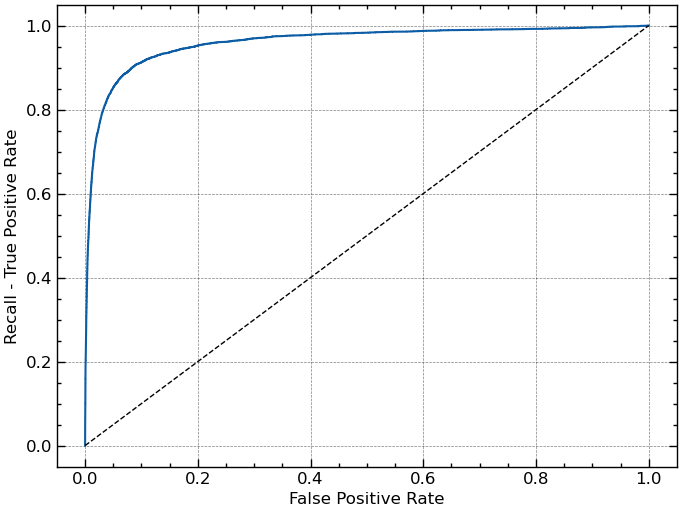

In [38]:
from sklearn.metrics import roc_curve

FPR, TPR, thresholds= roc_curve(y_train_5, y_scores)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.ylabel("Recall - True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)

plt.plot(FPR, TPR, linewidth=1.5)
plt.plot([0,1], [0,1], "k--", linewidth=1) # How to plot a line in matplotlib - just put the limits 
plt.savefig("ROC_curve")
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

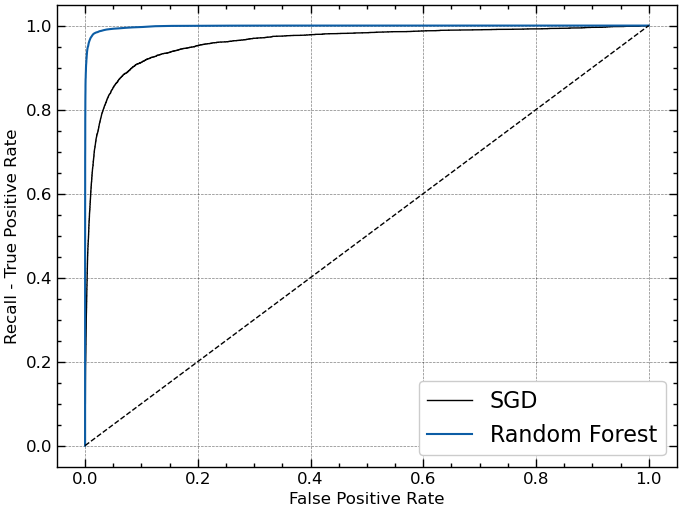

In [40]:
y_scores_forest = y_probas_forest[:, 1]
FPR_forest, TPR_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.ylabel("Recall - True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)

plt.plot(FPR, TPR, "k-", linewidth=1, label="SGD")
plt.plot(FPR_forest, TPR_forest, linewidth=1.5, label="Random Forest")
plt.plot([0,1], [0,1], "k--", linewidth=1) # How to plot a line in matplotlib - just put the limits 

plt.legend()

plt.savefig("ROC_curve")
plt.show()

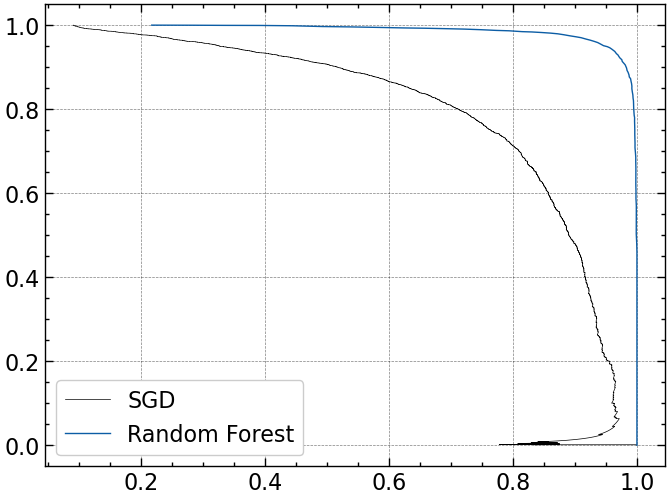

In [41]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.plot(precisions, recalls, "k-", linewidth=0.5, label="SGD")
plt.plot(precisions_forest, recalls_forest, linewidth=1, label="Random Forest")
plt.legend()

plt.savefig("Precision_reccal_curve")
plt.show()

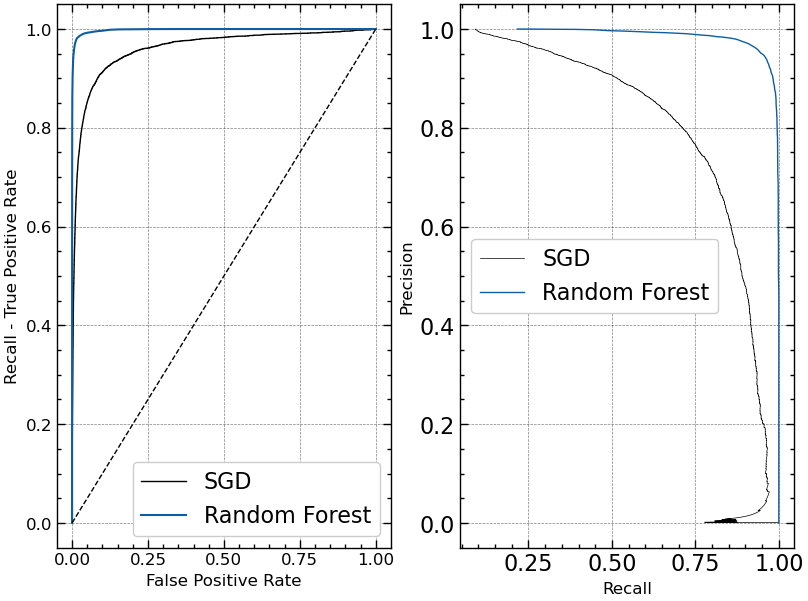

In [42]:
fig, axs = plt.subplots(1,2, constrained_layout=True)


ax = axs[0]
plt.sca(axs[0])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.set_ylabel("Recall - True Positive Rate", fontsize=12)
ax.set_xlabel("False Positive Rate", fontsize=12)

ax.plot(FPR, TPR, "k-", linewidth=1, label="SGD")
ax.plot(FPR_forest, TPR_forest, linewidth=1.5, label="Random Forest")
ax.plot([0,1], [0,1], "k--", linewidth=1) # How to plot a line in matplotlib - just put the limits 

ax.legend()

ax = axs[1]
plt.sca(axs[0])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.set_ylabel("Precision", fontsize=12)
ax.set_xlabel("Recall", fontsize=12)

ax.plot(precisions, recalls, "k-", linewidth=0.5, label="SGD")
ax.plot(precisions_forest, recalls_forest, linewidth=1, label="Random Forest")
ax.legend()

plt.savefig("ROC_X_Precision_recall")
plt.show()

# 🔵 Multiclass Classification

In [43]:
sgd_clf.fit(X_train.values, y_train)

SGDClassifier(random_state=42)

In [44]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [45]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [46]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train.values, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [47]:
forest_clf.fit(X_train.values, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [48]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

### Scaling the data increases accuracy!

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

# 🔵 Error Analysis

## Undertanding The Confusion Matrix

In [50]:
from sklearn.utils.multiclass import unique_labels

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [52]:
labels = unique_labels(y_train_pred)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [53]:
precision_score(y_train, y_train_pred, average=None)

array([0.96856547, 0.97279222, 0.92586023, 0.91573231, 0.93605491,
       0.88104679, 0.9532967 , 0.94638695, 0.65998055, 0.89896145])

In [54]:
def print_label_score(labels, score):
    if labels.size != score.size:
        raise("Labels and Score must have the same size.")
    
    for label, score in zip(labels, score):
        print(f"{label}: {score}")

In [55]:
print_label_score(labels, precision_score(y_train, y_train_pred, average=None))

0: 0.9685654741229593
1: 0.9727922176622587
2: 0.9258602341255765
3: 0.9157323055360898
4: 0.9360549132947977
5: 0.8810467882632831
6: 0.9532967032967034
7: 0.9463869463869464
8: 0.6599805494772673
9: 0.8989614504488647


In [56]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [57]:
index = pd.MultiIndex.from_product([["Actual Values"], labels])
columns = pd.MultiIndex.from_product([["Predicted Values"], labels])

conf_mx_df = pd.DataFrame(conf_mx, index=index, columns=columns)
conf_mx_df

Predicted Values                                            \
                               0     1     2     3     4     5     6     7   
Actual Values 0             5577     0    22     5     8    43    36     6   
              1                0  6400    37    24     4    44     4     7   
              2               27    27  5220    92    73    27    67    36   
              3               22    17   117  5227     2   203    27    40   
              4               12    14    41     9  5182    12    34    27   
              5               27    15    30   168    53  4444    75    14   
              6               30    15    42     3    44    97  5552     3   
              7               21    10    51    30    49    12     3  5684   
              8               17    63    48    86     3   126    25    10   
              9               25    18    30    64   118    36     1   179   

                             
                    8     9  
Actual Values 0   225     1  
              1   212    10  
              2   378    11  
              3   403    73  
              4   347   164  
              5   535    60  
              6   131     1  
              7   195   210  
              8  5429    44  
              9   371  5107

### Precision

In [58]:
TP = conf_mx[0, 0]
FP = conf_mx[1:10, 0]
display(FP)

precision_0 = TP / (TP + FP.sum())
precision_0

array([ 0, 27, 22, 12, 27, 30, 21, 17, 25], dtype=int64)

0.9685654741229593

### Recall

In [59]:
recall_score(y_train, y_train_pred, average=None)

array([0.94158366, 0.94927321, 0.87613293, 0.8525526 , 0.88702499,
       0.81977495, 0.93815478, 0.90726257, 0.92787558, 0.85846361])

In [60]:
FN = conf_mx[0, 1:10]

recall_0 = TP /(TP + FN.sum())
recall_0

0.9415836569306095

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_train, y_train_pred)

0.8970333333333333

In [63]:
conf_mx.sum()

60000

In [64]:
soma = 0
for i in range(0, 10):
        soma = soma + conf_mx[i, i]
soma/conf_mx.sum()

0.8970333333333333

In [65]:
import seaborn as sns

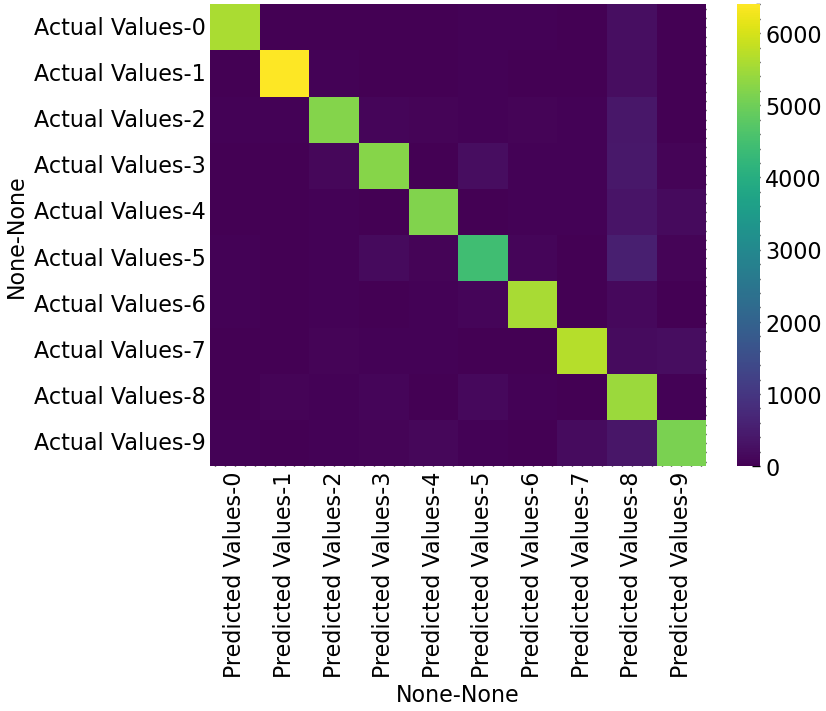

In [69]:
sns.heatmap(conf_mx_df, cmap="viridis")
plt.show()

In [87]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
display(row_sums)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

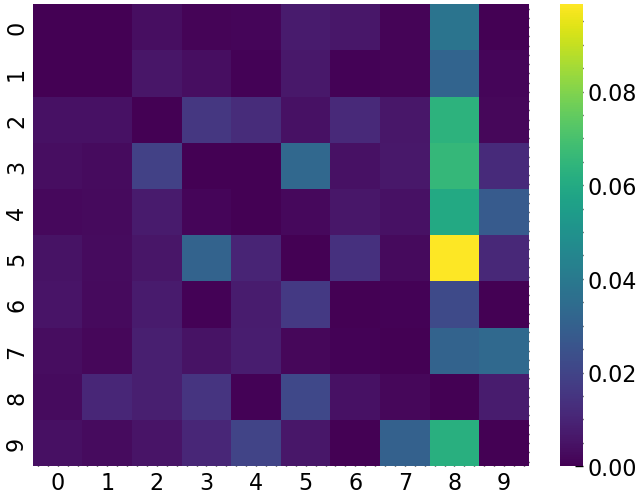

In [91]:
sns.heatmap(norm_conf_mx, cmap="viridis")
plt.savefig("Normalized Confusion Matrix Heatmap")
plt.show()

## Analysing Specific Erros

In [93]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

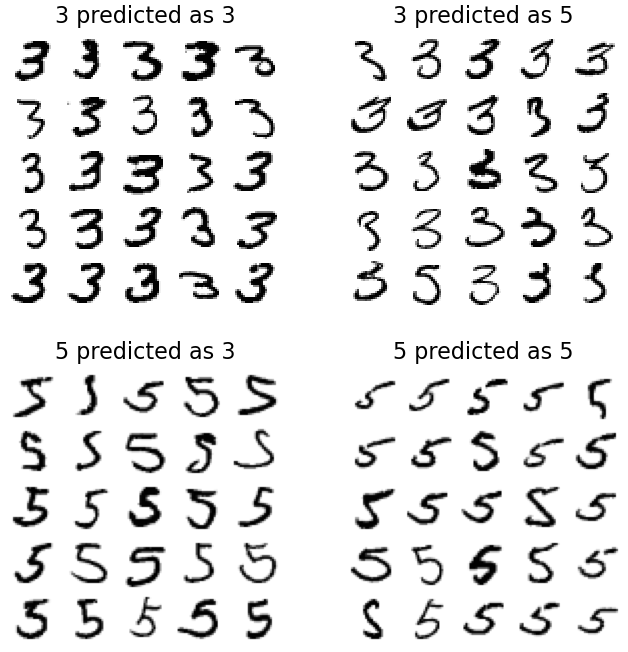

In [103]:
plt.figure(figsize=(8,8))
plt.subplot(221); 
plt.title("3 predicted as 3")
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); 
plt.title("3 predicted as 5")
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); 
plot_digits(X_ba[:25], images_per_row=5)
plt.title("5 predicted as 3")
plt.subplot(224); 
plt.title("5 predicted as 5")
plot_digits(X_bb[:25], images_per_row=5)

plt.savefig("3&5 erros")

# 🔵 Multilabel Classification

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [111]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [116]:
knn_clf.predict([some_digit])

D:\Users\lreis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Users\lreis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[False,  True]])

This classifier states that 5 is not greater or equal to 7 and it is odd - a multilabel classification

In [117]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

D:\Users\lreis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\lreis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

NameError: name 'f1_score' is not defined

In [120]:
from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

# Multiclass Multioutput Classification